<center><h1>DSCI-552 HW_5</h1></center>
<br>
<center><font size="4">Name: Jiade Song    GitHubID: JiadeSong     USCID: 9019610285 </font></center>

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
# import graphviz 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from impyute.imputation.cs import fast_knn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

<center><font size="4">1. Decision Trees as Interpretable Models</font></center>

### (b) Build a decision tree on the whole data set and plot it.

In [2]:
file_path = r'../../Data/diagnosis.data'
Accute_Inflamations = pd.read_csv(file_path, delimiter="\t",header=None, encoding='UTF_16', decimal=',')

In [3]:
Accute_Inflamations.columns =['Temp', 'nausea', 'LP', 'UP', 'MP','Burn','Inflammation','Nephritis']
Accute_Inflamations['class'] = ' '
Accute_Inflamations
for i in range(0,120):
    if Accute_Inflamations['Inflammation'][i] == 'no':
        if Accute_Inflamations['Nephritis'][i] == 'no':
            Accute_Inflamations['class'][i] = '1'
        elif Accute_Inflamations['Nephritis'][i] == 'yes':
            Accute_Inflamations['class'][i] = '2'
    elif Accute_Inflamations['Inflammation'][i] == 'yes':
        if Accute_Inflamations['Nephritis'][i] == 'no':
            Accute_Inflamations['class'][i] = '3'
        elif Accute_Inflamations['Nephritis'][i] == 'yes':
            Accute_Inflamations['class'][i] = '4'
Accute_Inflamations
# class = 1: Inflammation = no and Nephritis = no
# class = 2: Inflammation = no and Nephritis = yes
# class = 3: Inflammation = yes and Nephritis = no
# class = 4: Inflammation = yes and Nephritis = yes

<ipython-input-3-1460067e1062>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accute_Inflamations['class'][i] = '1'
<ipython-input-3-1460067e1062>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accute_Inflamations['class'][i] = '3'
<ipython-input-3-1460067e1062>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accute_Inflamations['class'][i] = '2'
<ipython-input-3-1460067e1062>:14: SettingWithCopyWarning: 
A value is trying to be 

,Temp,nausea,LP,UP,MP,Burn,Inflammation,Nephritis,class
0,35.5,no,yes,no,no,no,no,no,1
1,35.9,no,no,yes,yes,yes,yes,no,3
2,35.9,no,yes,no,no,no,no,no,1
3,36.0,no,no,yes,yes,yes,yes,no,3
4,36.0,no,yes,no,no,no,no,no,1
...,...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes,2
116,41.5,no,no,no,no,no,no,no,1
117,41.5,yes,yes,no,yes,no,no,yes,2
118,41.5,no,yes,yes,no,yes,no,yes,2


In [4]:
x = Accute_Inflamations.iloc[:, 0:6]
y = Accute_Inflamations['class']
y

0      1
1      3
2      1
3      3
4      1
      ..
115    2
116    1
117    2
118    2
119    2
Name: class, Length: 120, dtype: object

In [5]:
encoder = OrdinalEncoder()
encoder.fit(x.iloc[:, 1:])
X_encoded = encoder.transform(x.iloc[:, 1:])
X_encoded_df = pd.DataFrame(X_encoded)
X_encoded_df.columns =['nausea', 'LP', 'UP', 'MP','Burn']
x['nausea'] = X_encoded_df['nausea']
x['LP'] = X_encoded_df['LP']
x['UP'] = X_encoded_df['UP']
x['MP'] = X_encoded_df['MP']
x['Burn'] = X_encoded_df['Burn']
x

,Temp,nausea,LP,UP,MP,Burn
0,35.5,0.0,1.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0
2,35.9,0.0,1.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0
4,36.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
115,41.4,0.0,1.0,1.0,0.0,1.0
116,41.5,0.0,0.0,0.0,0.0,0.0
117,41.5,1.0,1.0,0.0,1.0,0.0
118,41.5,0.0,1.0,1.0,0.0,1.0


In [6]:
DTC = tree.DecisionTreeClassifier(criterion='gini')
md = DTC.fit(x,y)

[Text(133.92000000000002, 195.696, 'X[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 31, 40, 19]'),
 Text(66.96000000000001, 152.208, 'X[0] <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 0, 40, 0]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40, 0]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 31, 0, 19]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 31, 0, 19]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 10, 0, 19]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(301.32000000000005, 21.744, 'gini = 0.0\nsamples = 19\nvalue = [0, 0,

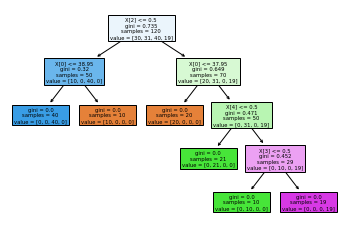

In [7]:
tree.plot_tree(md, filled=True)


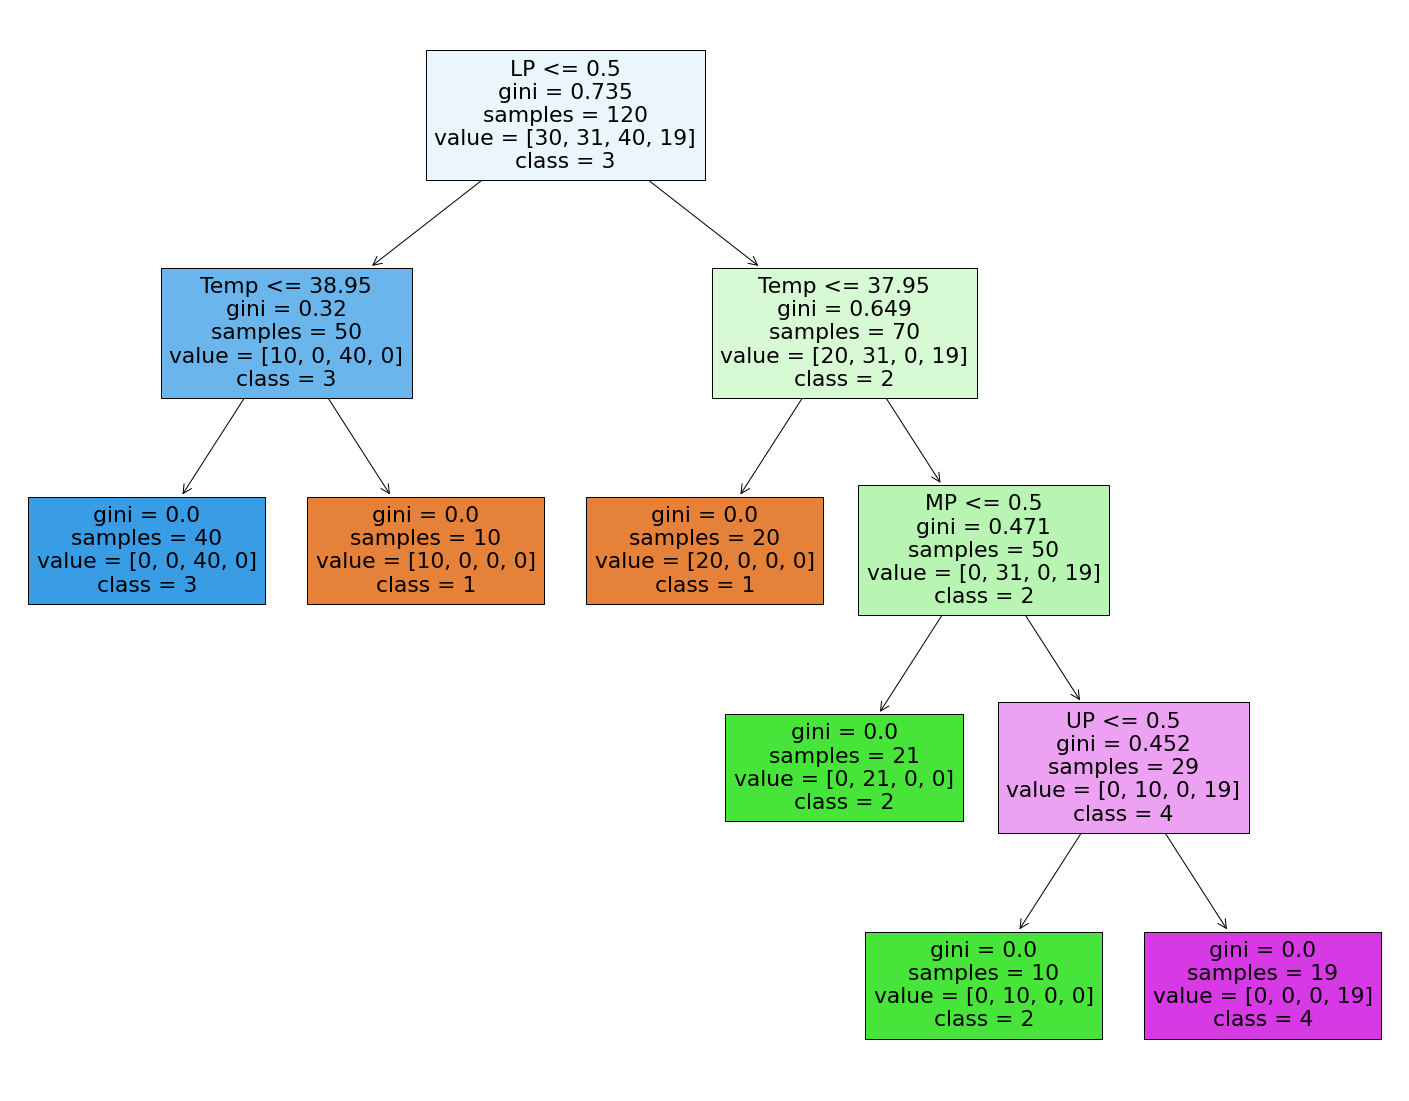

In [8]:
text_representation = tree.export_text(md)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
    
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(md, feature_names=['Temp','nausea', 'LP', 'UP', 'MP','Burn'],  
                   class_names=['1','2','3','4'],
                   filled=True)

    Answer: decision tree shows above

### (c) Convert the decision rules into a set of IF-THEN rules.

In [9]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as a Python function
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

In [10]:
tree_to_code(md, ['Temp','nausea', 'LP', 'UP', 'MP','Burn'])

def tree(Temp, nausea, LP, UP, MP, Burn):
  if LP <= 0.5:
    if Temp <= 38.95000076293945:
      return [[ 0.  0. 40.  0.]]
    else:  # if Temp > 38.95000076293945
      return [[10.  0.  0.  0.]]
  else:  # if LP > 0.5
    if Temp <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if Temp > 37.95000076293945
      if MP <= 0.5:
        return [[ 0. 21.  0.  0.]]
      else:  # if MP > 0.5
        if UP <= 0.5:
          return [[ 0. 10.  0.  0.]]
        else:  # if UP > 0.5
          return [[ 0.  0.  0. 19.]]


    Answer: IF-THEN rules shows above

### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [11]:
X_train, X_test, y_train, y_test =train_test_split(x, y,test_size=.3,random_state=24)

In [12]:
clf_pruned = tree.DecisionTreeClassifier(criterion = "gini", random_state = 24)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

In [13]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.9444444444444444
1.0


In [14]:
path = clf_pruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

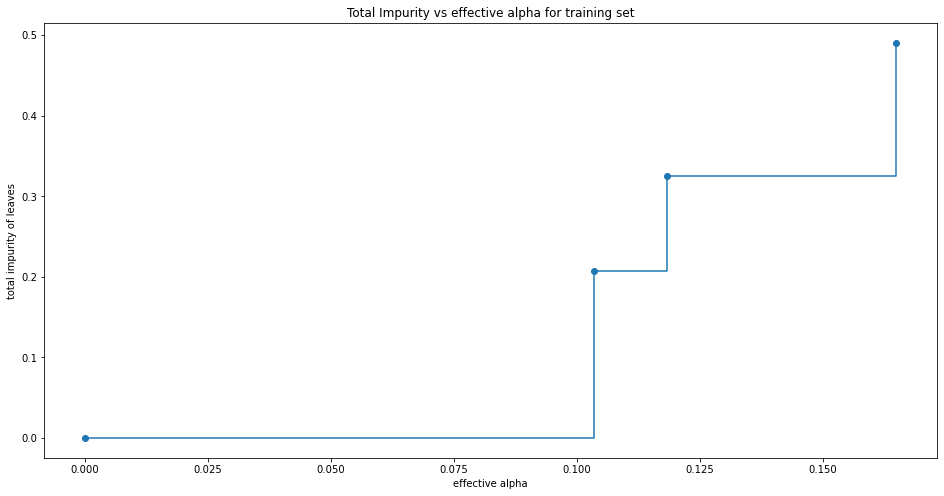

In [15]:
fig, ax = plt.subplots(figsize=(16,8));
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post");
ax.set_xlabel("effective alpha");
ax.set_ylabel("total impurity of leaves");
ax.set_title("Total Impurity vs effective alpha for training set");

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=24, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
ccp_alphas

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24156948493683195


array([0.        , 0.1036036 , 0.11836735, 0.16499882, 0.24156948])

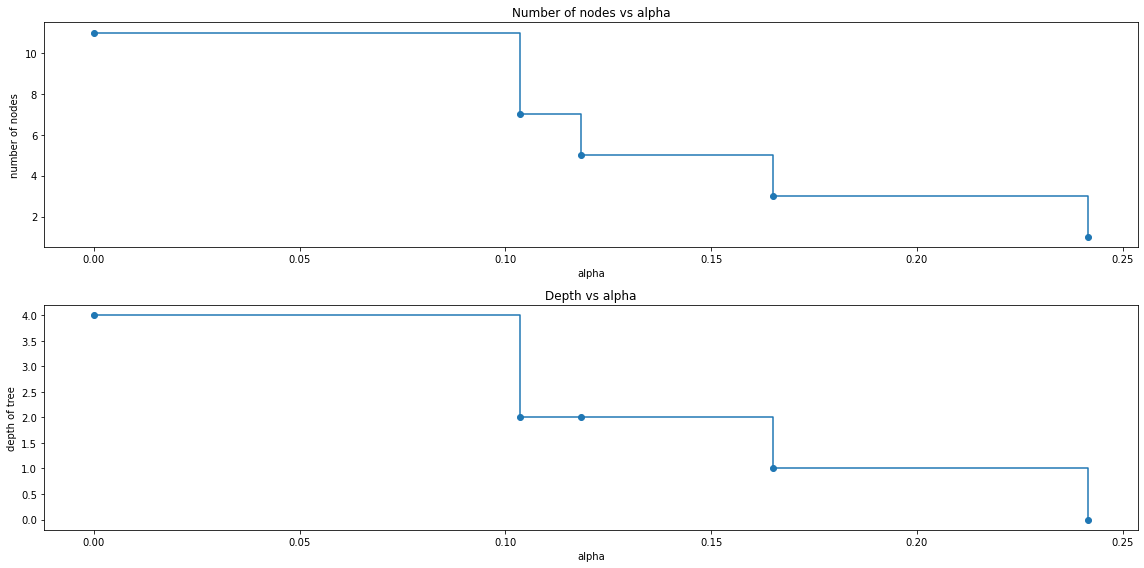

In [17]:

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(16,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
# source: https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77

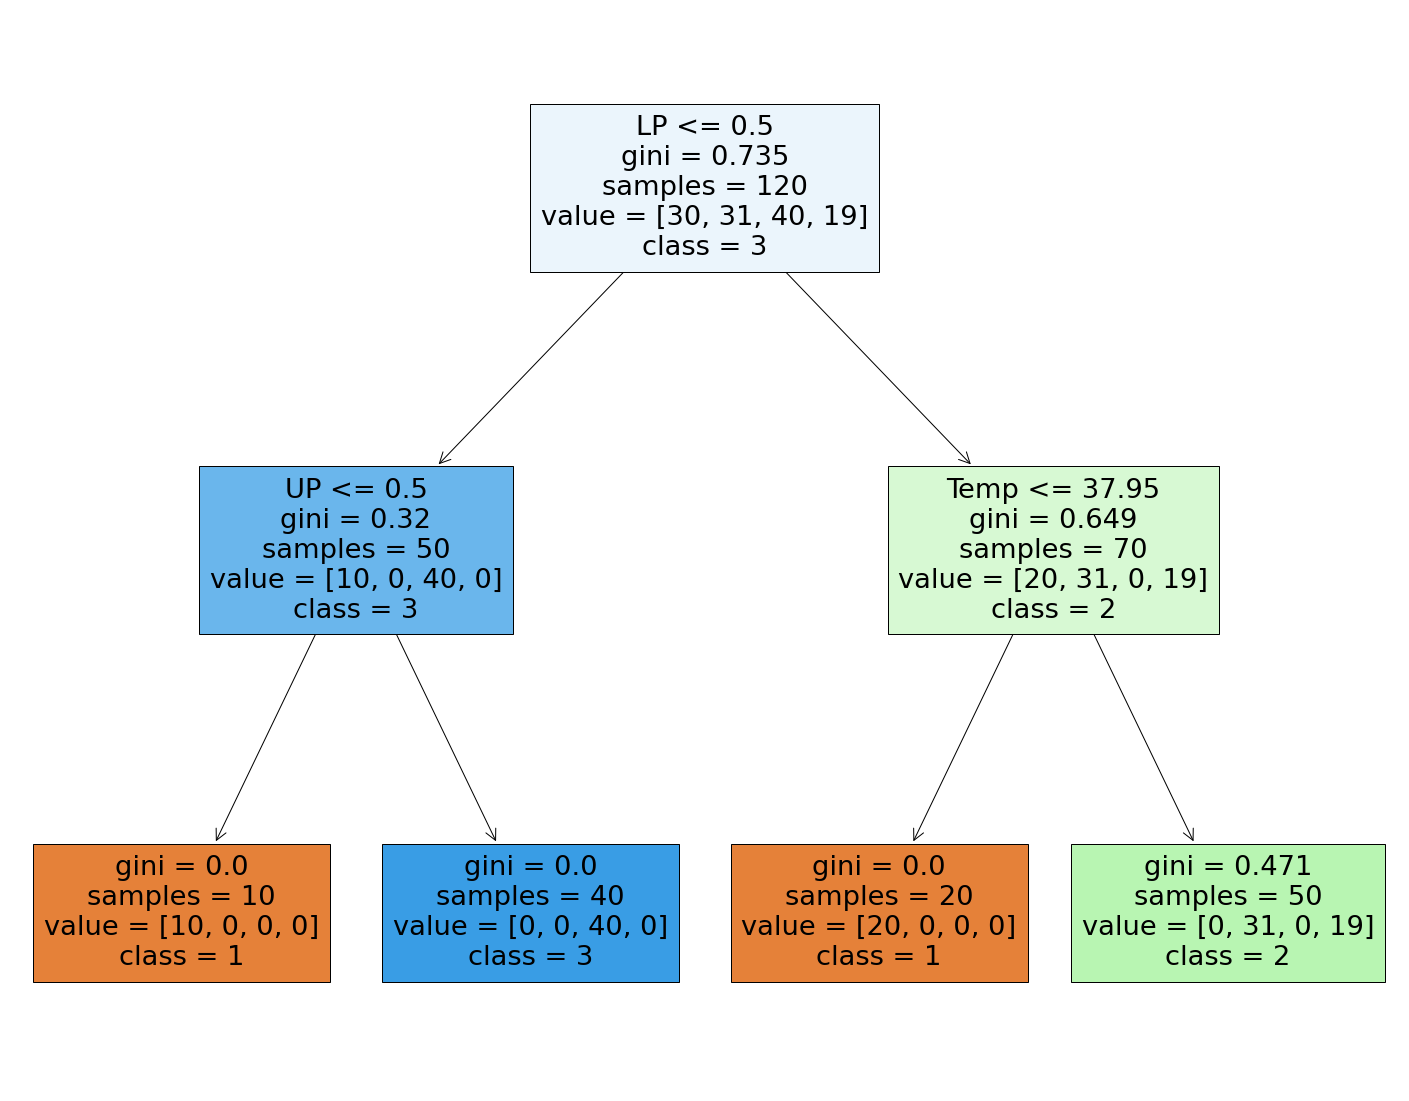

In [18]:
DTC_opt = tree.DecisionTreeClassifier(criterion='gini',ccp_alpha=0.1036036)
md_opt = DTC_opt.fit(x,y)

text_representation = tree.export_text(md_opt)
with open("decistion_tree_opt.log", "w") as fout:
    fout.write(text_representation)
    
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(md_opt, feature_names=['Temp','nausea', 'LP', 'UP', 'MP','Burn'],  
                   class_names=['1','2','3','4'],
                   filled=True)

<center><font size="4">2. The LASSO and Boosting for Regression</font></center>

### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [19]:
file_path = r'../../Data/communities.data'
raw_communities = pd.read_csv(file_path, delimiter=",",header=None)

In [20]:
communities = raw_communities.drop(labels=[0,1,2,3,4],axis=1)

In [21]:
communities_training = communities[:][:1495]
communities_testing = communities[:][1496:]
communities_testing

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,?,?,?,?,0.00,?,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,?,?,?,?,0.00,?,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,?,?,?,?,0.00,?,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,?,?,?,?,0.00,?,0.12
1500,0.01,0.48,0.02,0.77,0.84,0.05,0.37,0.26,0.20,0.50,...,0.01,0.23,0.05,?,?,?,?,0.00,?,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [22]:
# missing = []
# for i in communities.columns:
#     missing.append(len(communities[communities[i] == '?'])/1994)

In [23]:
# missing_small_index = np.where(np.array(missing) >= 0.8)
# missing_large_index = np.where((np.array(missing) > 0) & (np.array(missing) < 0.8) )
# missing_small_index

In [24]:
nan_com_test = communities_testing.replace('?', np.NaN)
float_com_test = nan_com_test.astype(float)

nan_com_train = communities_training.replace('?', np.NaN)
float_com_train = nan_com_train.astype(float)

In [25]:
imputed_test=fast_knn(float_com_test.values)
imputed_train=fast_knn(float_com_train.values)


In [26]:
df_test = pd.DataFrame(imputed_test)
df_train = pd.DataFrame(imputed_train)

df_test_x = df_test.iloc[:, :-1]
df_train_x = df_train.iloc[:, :-1]

df_test_y = df_test.iloc[:, -1]
df_train_y = df_train.iloc[:, -1]
df_train_x

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


    Answer: training data imputation are shown above. 

### (c) Plot a correlation matrix for the features in the data set.

In [27]:
corrMatrix = pd.DataFrame(df_train_x.corr())
corrMatrix

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,1.000000,-0.040404,0.242144,-0.306023,0.168868,0.162282,0.014554,0.128721,0.075744,-0.107060,...,0.120981,0.747424,0.235510,0.283682,0.640301,0.598701,-0.064393,0.046052,0.464459,-0.012247
1,-0.040404,1.000000,-0.068374,-0.243565,0.209848,0.473320,0.517742,0.371658,0.301949,-0.606714,...,0.030199,-0.020832,-0.003807,-0.030652,-0.012623,0.006455,-0.025435,0.005577,-0.086315,-0.020685
2,0.242144,-0.068374,1.000000,-0.793431,-0.104912,-0.069449,0.118272,0.143406,0.125330,0.056381,...,-0.077216,0.155017,0.101270,0.169002,0.140611,0.102129,-0.115669,0.026505,0.257781,0.042193
3,-0.306023,-0.243565,-0.793431,1.000000,-0.270829,-0.436737,-0.189135,-0.258390,-0.175195,0.138619,...,-0.013107,-0.147054,-0.339787,-0.234460,-0.126921,-0.123406,0.078052,-0.055503,-0.272366,-0.029872
4,0.168868,0.209848,-0.104912,-0.270829,1.000000,0.264600,-0.017945,0.106958,0.056442,-0.283709,...,0.165412,0.004790,0.360708,0.274826,-0.034066,0.039820,0.038631,0.053778,0.100653,-0.001330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.598701,0.006455,0.102129,-0.123406,0.039820,0.069943,-0.008935,0.017046,0.002144,-0.031817,...,0.101258,0.441746,0.128066,0.172220,0.837231,1.000000,-0.071443,-0.011448,-0.065645,0.297331
118,-0.064393,-0.025435,-0.115669,0.078052,0.038631,0.019618,-0.025043,-0.007888,-0.004834,0.018303,...,0.018073,-0.071635,0.071833,0.028589,-0.119873,-0.071443,1.000000,-0.035578,0.031338,-0.186873
119,0.046052,0.005577,0.026505,-0.055503,0.053778,0.052272,0.032324,0.014731,0.013209,-0.033793,...,0.123609,0.077027,-0.078811,-0.090487,0.012494,-0.011448,-0.035578,1.000000,-0.017674,-0.041799
120,0.464459,-0.086315,0.257781,-0.272366,0.100653,0.126210,0.012529,0.117998,0.083582,-0.022575,...,-0.013400,0.322885,0.236545,0.209710,-0.054489,-0.065645,0.031338,-0.017674,1.000000,0.018062


    Answer: correlation matrix are shown above. 

### d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean..

In [28]:
cv = lambda x: np.std(x) / np.mean(x) * 100 
cv_df = pd.DataFrame(df_train_x.apply(cv))
cv_df

,0
0,224.035497
1,35.568055
2,142.840745
3,33.010221
4,135.864506
...,...
117,74.897039
118,11.618069
119,36.697907
120,255.209154


### (e) Pick sqrt(128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [29]:
# Rounding down of sqrt(128) is 11.

In [30]:
selected_feature = cv_df.sort_values(by=[0], ascending=False)[:11].index
selected_feature

Int64Index([90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5], dtype='int64')

In [31]:
selected_columns = [90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5, 122]
df_selected_columns = df_train[selected_columns]

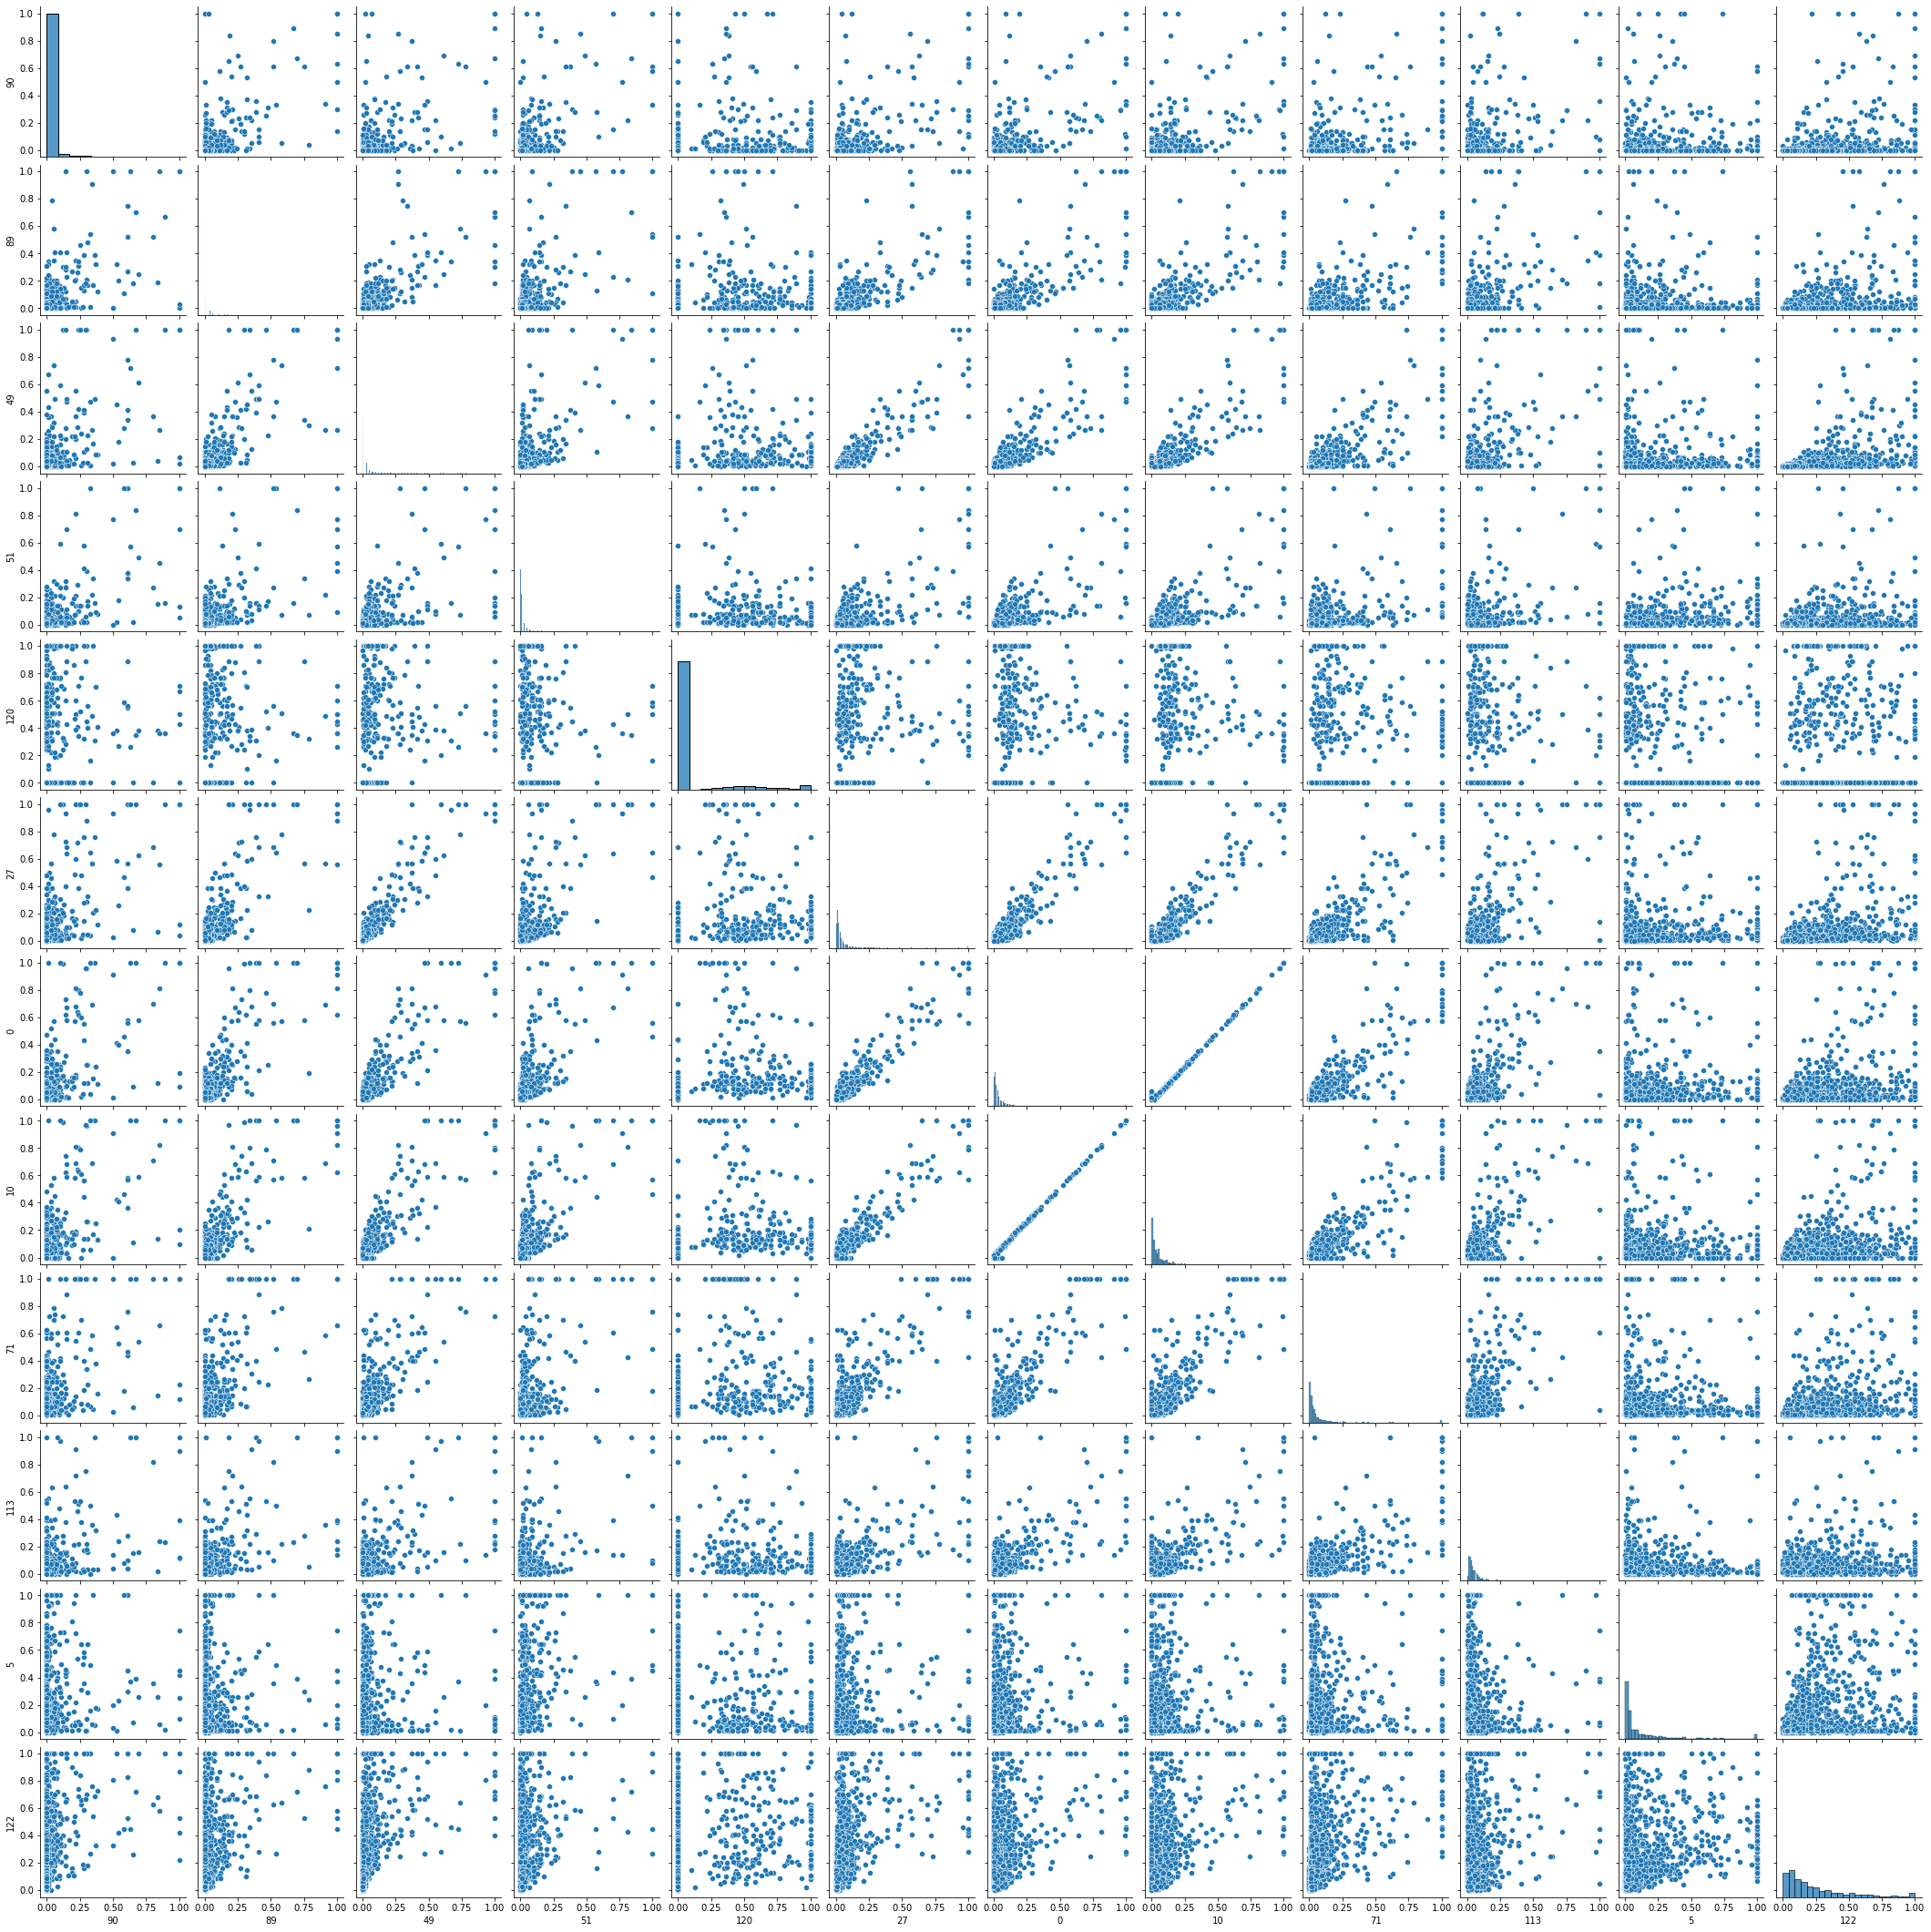

In [32]:
sns.pairplot(df_selected_columns)

<AxesSubplot:>

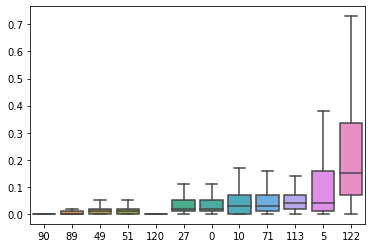

In [33]:
sns.boxplot(data = df_selected_columns,showfliers = False)


    Answer: box plots and scatter plots are shown above. Some selected features are very highly correlated and could be seen from the paired scatter plot. However, the significance of each features of the target labels are not obvious.  

### (f) Fit a linear model using least squares to the training set and report the test error.

In [34]:
Lreg = LinearRegression()
lrmd = Lreg.fit(df_train_x, df_train_y)
pred_test_y_lr = lrmd.predict(df_test_x)

testing_error_lr = mean_squared_error(df_test_y,pred_test_y_lr)
testing_error_lr


0.018041877307218734

    Answer: the test error is 0.018. 

### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [35]:
Rcvrmd = RidgeCV().fit(df_train_x, df_train_y)
pred_test_y_rcv = Rcvrmd.predict(df_test_x)

testing_error_rcv = mean_squared_error(df_test_y,pred_test_y_rcv)
testing_error_rcv


0.017703321920320158

In [36]:
Rcvrmd.best_score_


-0.019125676307943273

    Answer: test error for ridge regression is 0.0177.

### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.

In [37]:
Lcvmd = LassoCV(cv=5, random_state=24,max_iter=10000).fit(df_train_x, df_train_y)
pred_test_y_lcv = Lcvmd.predict(df_test_x)

testing_error_lcv = mean_squared_error(df_test_y,pred_test_y_lcv)
testing_error_lcv


0.01769764880694044

In [38]:
np.where(np.array(Lcvmd.coef_) == 0)


(array([  0,   1,   3,   5,   8,   9,  10,  12,  19,  20,  27,  30,  31,
         32,  35,  37,  41,  42,  43,  47,  53,  54,  56,  57,  58,  60,
         62,  65,  66,  73,  80,  81,  83,  84,  93,  95,  96,  97,  98,
        101, 103, 105, 109, 116, 117, 121]),)

In [39]:
scaler_train = StandardScaler().fit(df_train_x)
df_train_x_scaled = scaler_train.transform(df_train_x)

scaler_test = StandardScaler().fit(df_test_x)
df_test_x_scaled = scaler_test.transform(df_test_x)

In [40]:
Lcvmd_sca = LassoCV(cv=5, random_state=24,max_iter=10000).fit(df_train_x_scaled, df_train_y)
pred_test_y_lcv_sca = Lcvmd_sca.predict(df_test_x_scaled)

testing_error_lcv_sca = mean_squared_error(df_test_y,pred_test_y_lcv_sca)
testing_error_lcv_sca

0.017923257857024904

In [41]:
np.where(np.array(Lcvmd_sca.coef_) == 0)

(array([  0,   1,   3,   5,   8,   9,  10,  12,  19,  20,  27,  30,  31,
         32,  35,  36,  37,  41,  42,  43,  47,  52,  54,  56,  57,  58,
         60,  62,  65,  66,  70,  73,  79,  80,  81,  83,  84,  92,  93,
         95,  96,  97,  98, 101, 103, 105, 109, 117, 120, 121]),)

    Answer: original data with lasso has a error of 0.0177 and standardized data with lasso has a error of 0.0179, which means scaled data has a slightly higher error. variables chosen are shown above. 

### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.


M is: 95


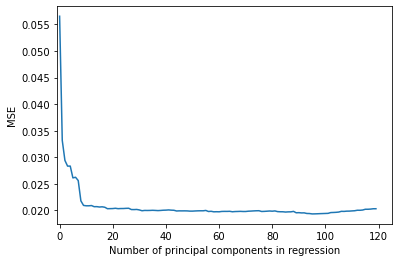

In [42]:
pcr = PCA()
X_reduced_train = pcr.fit_transform(df_train_x_scaled)
n = len(X_reduced_train)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=24)
mse = []
regr = LinearRegression()
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), df_train_y.ravel(), \
                                           cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
for i in np.arange(1, 120):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], df_train_y.ravel(), \
                                               cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse))
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);
print('M is: '+str(np.where(np.array(mse) == min(mse))[0][0]))

# Source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html

In [43]:

Lreg = LinearRegression()
lrmd_pcr = Lreg.fit(X_reduced_train[:,:95], df_train_y)
X_reduced_test = pcr.fit_transform(df_test_x_scaled)
pred_test_y_lr_pcr = lrmd_pcr.predict(X_reduced_test[:,:95])

testing_error_lr_pcr = mean_squared_error(df_test_y,pred_test_y_lr_pcr)
testing_error_lr_pcr

0.02819111583617928

    Answer: M is 95 and test error is 0.028. 

#### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [44]:
XGBmd = XGBRegressor()
param_alpha = {'reg_alpha':[ 1, 3, 4, 5,6,7, 10, 50],"objective":["reg:squarederror"]}
gsearch = GridSearchCV(estimator = XGBmd, param_grid = param_alpha, scoring='neg_mean_squared_error')
gsearch.fit(df_train_x, df_train_y)
gsearch.best_params_

{'objective': 'reg:squarederror', 'reg_alpha': 5}

In [45]:
xgb_opt = GridSearchCV(estimator = XGBmd, param_grid = {'reg_alpha':[5],"objective":["reg:squarederror"]}\
                       , scoring='neg_mean_squared_error').fit(df_train_x, df_train_y)
pred_test_y_xgb = xgb_opt.predict(df_test_x)

testing_error_xgb = mean_squared_error(df_test_y,pred_test_y_xgb)
testing_error_xgb

0.017423313155067215

    Answer: the optimal alpha is 5. 